In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

data = pd.read_csv('housing (1).csv', header = None, delimiter = r"\s+", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
print(data.shape)
data.head(5)


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [281]:
features = data.iloc[:,:13]
price = data.iloc[:,13]

### Scale the features

In [282]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

### Split dataset into training and test set (80/20)

In [283]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, price, test_size = 0.2 )

### Predict price with simple linear regression 

In [284]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predicted_price_lr = lr.predict(x_test)
#check out the coefficients for this model, θ1, θ2, θ3, ....θ13
feature_coef_lr = lr.coef_
feature_coef_lr

array([ -5.89054334,   5.02371329,   1.3764924 ,   1.49701303,
        -8.32120102,  20.76603776,  -0.73988585, -15.97165477,
         6.02936551,  -6.10519704,  -9.3978146 ,   4.14356797,
       -17.59333774])

In [285]:
#check the coefficient,θo, for this model
intercept_lr = lr.intercept_
intercept_lr

25.71637273296131

In [286]:
#find the MSE
mse_lr = mean_squared_error(y_test,predicted_price_lr)
mse_lr

26.19604103221738

### Predict price with ridge regression

In [287]:
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)
predicted_price_ridge = ridge_reg.predict(x_test)
#check out the coefficients for this model, θ1, θ2, θ3, ....θ13
feature_coef_ridge = ridge_reg.coef_
feature_coef_ridge


array([ -3.34246764,   4.07387723,   0.4257987 ,   1.71810703,
        -6.490114  ,  18.76202127,  -0.65186377, -12.56428504,
         4.65360781,  -4.91735593,  -9.21790896,   4.24208654,
       -17.11621387])

In [288]:
#check the coefficient,θo, for this model
intercept_ridge = ridge_reg.intercept_
intercept_ridge

25.261662242787978

In [289]:
#find the MSE
mse_ridge = mean_squared_error(y_test,predicted_price_ridge)
mse_ridge

27.500274756814175

### Predict price with Lasso regression

In [290]:
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)
predicted_price_lasso = lasso_reg.predict(x_test)
#check out the coefficients for this model, θ1, θ2, θ3, ....θ13
feature_coef_lasso = lasso_reg.coef_
feature_coef_lasso


array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -1.38628446,
       -0.        ,  0.        , -5.9616485 ])

In [291]:
#find the MSE for the Lasso regression model
mse_lasso = mean_squared_error(y_test,predicted_price_lasso)
mse_lasso

80.39291633165416

## Comparing the coefficients obtained for the different techniques

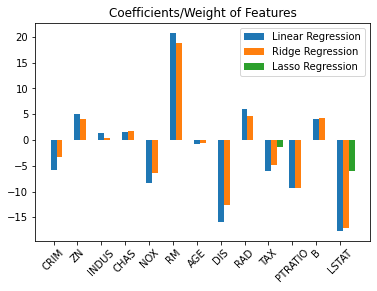

In [292]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

x_values = np.arange(len(column_names))
width = 0.25

plt.bar(x_values,feature_coef_lr,width, label = 'Linear Regression')
plt.bar(x_values + width,feature_coef_ridge, width, label = 'Ridge Regression')
plt.bar(x_values + width*2,feature_coef_lasso, width, label = 'Lasso Regression')
plt.xticks(x_values,column_names,rotation = 45)
plt.title('Coefficients/Weight of Features')
plt.legend()
plt.show()

From the plot, we can observe that the linear regression modelhas the highest value for all the coefficients. With ridge regression using a regularization parameter of 1, the coefficients for all the features are slightly reduced. 
However, for lasso regression with a regularization parameter of 1, almost all the coefficients are forced to zero.

## Analysing the effect of regularization parameter on the coefficients

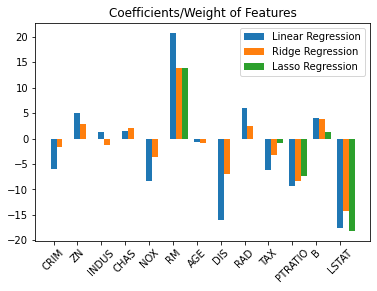

In [303]:
#Using alpha = 5 for the ride regression
ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(x_train,y_train)
coef_ridge = ridge_reg.coef_

#Using alpha = 0.5 for the ride regression
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(x_train,y_train)
coef_lasso = lasso_reg.coef_

#plotting the new coefficients 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

x_values = np.arange(len(column_names))
width = 0.25

plt.bar(x_values,feature_coef_lr,width, label = 'Linear Regression')
plt.bar(x_values + width, coef_ridge,width, label = 'Ridge Regression')
plt.bar(x_values + width*2,coef_lasso, width, label = 'Lasso Regression')
plt.xticks(x_values,column_names,rotation = 45)
plt.title('Coefficients/Weight of Features')
plt.legend()
plt.show()


From the plot, we can see that increasing the regularization parameter for the ride regression model resulted in the coefficients being reduced more.
On the other hand, reducing the parameter for the Lasso model lessened the regularization effect on the coefficients and increased the complexity of the model.

## Analysing the Learning Curves for the three models

For a well fit model with enough data, the training error would start from zero and continue to increase while the validation error would start from a very high value and then continue to decrease. As the training set increases and the model learns with more data, the the training error and the validation error will start to stabilize and converge towards each other. 

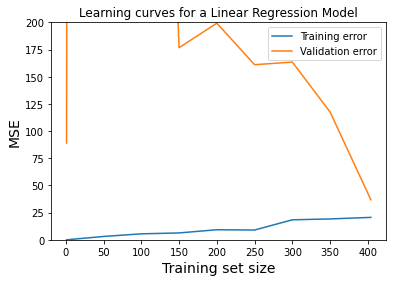

In [308]:
#For linear regression model
#compare the learning curves for training & testing 

#pd.set_option('display.float_format', lambda x: '%.3f' % x)

train_sizes = [1,50,100,150,200,250,300,350,404]

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(), X = scaled_features, 
                                                              y = price, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_series = pd.Series(validation_scores_mean, index = train_sizes)
train_series = pd.Series(train_scores_mean, index = train_sizes)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Linear Regression Model')
plt.legend()
plt.ylim(0,200)
plt.show()


The learning curve for the linear regression model shows the usual trend at the beginning, i.e. training error increases and validation error reduces. With more training data, the training error seems to start stabilizing. The validation error reduces towards the training error but does not stabilize and both error curves do not converge. 
It would seem like the training data is not enough to train the linear regression model.

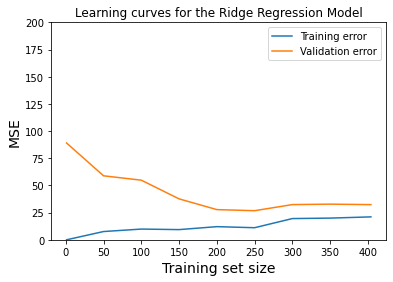

In [309]:
#For ridge regression model
#compare the learning curves for training & testing 

#pd.set_option('display.float_format', lambda x: '%.3f' % x)

train_sizes = [1,50,100,150,200,250,300,350,404]

train_sizes, train_scores, validation_scores = learning_curve(estimator = Ridge(alpha = 1), X = scaled_features, 
                                                              y = price, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_series = pd.Series(validation_scores_mean, index = train_sizes)
train_series = pd.Series(train_scores_mean, index = train_sizes)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the Ridge Regression Model')
plt.ylim(0,200)
plt.legend()
plt.show()


The learning curve for the ridge regression model shows the usual trend at the beginning, i.e. training error increases and validation error reduces. With more training data,both the training and validation errors and start to stabilise but never fully stabilize or converge.
The training error is quite low, which shows that the model has low bias but because there is still a large gap between both errors, the model might be overfitting.
Adding more training data or tuning the regularization parameter can increase the performance of this model.

C:\Users\ASUS\anaconda3.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

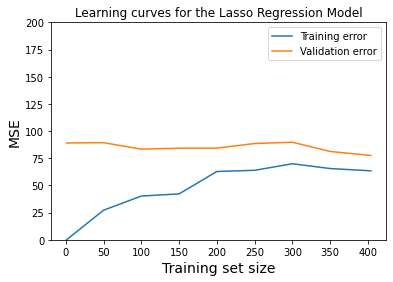

In [311]:
#For lasso regression model
#compare the learning curves for training & testing 

#pd.set_option('display.float_format', lambda x: '%.3f' % x)

train_sizes = [1,50,100,150,200,250,300,350,404]

train_sizes, train_scores, validation_scores = learning_curve(estimator = Lasso(), X = scaled_features, 
y = price, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_series = pd.Series(validation_scores_mean, index = train_sizes)
train_series = pd.Series(train_scores_mean, index = train_sizes)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the Lasso Regression Model')
plt.legend()
plt.ylim(0,200)
plt.show()


The learning curve for the lasso regression model shows that the model has high bias (the training error is quite high) and both errors do not stabilize or converge. 
This could be because the regularization parameter is too large and almost all the coefficients have been forced to zero. So the model is to simple. To improve this model, you can try smaller values of alpha.